William Thompson

# Youtube Spam Filtering

### Import and Prepare Data Set

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('YouTube-Spam-Collection-v1/Youtube04-Eminem.csv')

data

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
...,...,...,...,...,...
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1
445,LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8,The Guy That's Done Everything,NaN,3 yrs ago I had a health scare but thankfully ...,1
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0


##### Using the first [0.8H] of H hams and the first [0.8S] of S spams as your training set and the rest as our test set.

In [3]:
spams_df = data[data['CLASS'] == 1] #245 rows -- .8 = 196
hams_df = data[data['CLASS'] == 0] #203 rows -- .8 = 162

spams_train = spams_df.iloc[0:195, :]
spams_test = spams_df.iloc[196:, :]

hams_train = hams_df.iloc[0:161, :]
hams_test = hams_df.iloc[162:, :]

xtrS = spams_train[['CONTENT']]
xtrH = hams_train[['CONTENT']]

ytrS = spams_train[['CLASS']]
ytrH = hams_train[['CLASS']]

xteS = spams_test[['CONTENT']]
xteH = hams_test[['CONTENT']]

yteS = spams_test[['CLASS']]
yteH = hams_test[['CLASS']]

trainFramesX = [xtrS, xtrH]
X_Train = pd.concat(trainFramesX)
trainFramesY = [ytrS, ytrH]
Y_Train = pd.concat(trainFramesY)

testFramesX = [xteS, xteH]
X_Test = pd.concat(testFramesX)
testFramesY = [yteS, yteH]
Y_Test = pd.concat(testFramesY)

spams_train

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
6,z12zgrw5furdsn0sc233hfwavnznyhicq,kyeman13,NaN,Go check out my rapping video called Four Whee...,1
8,z12gxdortqzwhhqas04cfjrwituzghb5tvk0k,Muhammad Asim Mansha,NaN,Aslamu Lykum... From Pakistan﻿,1
...,...,...,...,...,...
336,LneaDw26bFsdjmaguMUCSqsUShQZWX4FLU2c58BV1mM,diabeat diaBEAT,NaN,I agree they are just damn spammers. They suck...,1
337,LneaDw26bFvA7_ot-Z3kQHP4GTE3g_Zc2fsfdZ4COpI,Adam B,NaN,adam b beats check out my page 2013,1
338,LneaDw26bFtdk45hGIs0TDD3NHx1srFG99yWWbEIXG0,Domen Kristan,NaN,CHECK OUT THESE LYRICS /watch?v=yUTTX04oyqQ,1
340,LneaDw26bFsPpgYyHcGAJk2dyALknpZ1ITQKBmY32HI,Chelsea Cameron,NaN,*****PLEASE READ***** Hey everyone! I&#39;m a...,1


In [3]:
# cor = X_Train.astype(str).values.tolist()
# print(cor)

# cor2 = X_Test.astype(str).values.tolist()

In [4]:
# corpus_Train = X_Train.to_string(header=False,
#                   index=False,
#                   index_names=False).split('\n')

# corpus_Test = X_Test.to_string(header=False,
#                   index=False,
#                   index_names=False).split('\n')

# corpus_Train

##### Representing each comment using TF-IDF features. Each comment is a document and the whole set of comments in the file (e.g. Eminem) is the corpus.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
V = vectorizer.fit(X_Train['CONTENT'])

train_predictions = V.transform(X_Train['CONTENT'])
test_predictions = V.transform(X_Test['CONTENT'])

train_vect = pd.DataFrame(train_predictions.toarray())
test_vect = pd.DataFrame(test_predictions.toarray())

train_vect


,0,1,2,3,4,5,6,7,8,9,...,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.105606,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### L2 (Ridge) Penalized Logistic Regression

##### We will find  λ using five fold cross-validation on our training set.  (log10 λ ∈ {−5, -4, ..., 5}.) We will then train L2-penalized Logistic Regression using the λ we found. Last we will calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for the training set and test set, as well as Fβ score for β ∈ {0.1, 0.5, .9, 1, 5, 10}.

In [6]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt

logistic = linear_model.LogisticRegression()

penalty = ['l2']
c = [1/pow(10,i) for i in range (-5, 6)]
print('C: ', c)

parameters = {"C": c,
             "penalty" :penalty,
             "solver":['liblinear']}

gridcv = GridSearchCV(logistic, parameters, cv=5, n_jobs=-1)

best_model = gridcv.fit(train_vect, Y_Train)

print('Best C: ', best_model.best_estimator_.get_params()['C'])
print("Lambda: ", 1/(best_model.best_estimator_.get_params()['C']))

Y_train_pred = best_model.predict(train_vect)
Y_test_pred = best_model.predict(test_vect)

# for train predictions
train_cm = confusion_matrix(Y_Train, Y_train_pred.reshape(-1,1))
train_TP = train_cm[0][0]
train_FP = train_cm[0][1]
train_FN = train_cm[1][0]
train_TN = train_cm[1][1]
train_precision = (train_TP)/(train_TP+train_FP)
train_recall = (train_TP)/(train_TP+train_FN)
train_f1 = f1_score(Y_Train, Y_train_pred.reshape(-1,1), average=None)

print("\nTraining Results: \n")
print("Confusion matrix: \n", train_cm, "\n\n")
print("Precision: ", train_precision, "\n")
print("Recall: ", train_recall, "\n")
print("F1 Score ", train_f1, "\n")


#for test predictions
test_cm = confusion_matrix(Y_Test, Y_test_pred.reshape(-1,1))
test_TP = test_cm[0][0]
test_FP = test_cm[0][1]
test_FN = test_cm[1][0]
test_TN = test_cm[1][1]
test_precision = (test_TP)/(test_TP+test_FP)
test_recall = (test_TP)/(test_TP+test_FN)
test_f1 = f1_score(Y_Test, Y_test_pred.reshape(-1,1), average=None)

print("\nTesting Results: \n")
print("Confusion matrix: \n", test_cm, "\n\n")
print("Precision: ", test_precision, "\n")
print("Recall: ", test_recall, "\n")
print("F1 Score ", test_f1, "\n")

print("F betas: \n")

betas = [.1, .5, .9, 1, 5, 10]
f_beta = []

for i in betas:
    f_beta.append((i**2+1)/(((i**2)/test_recall)+(1/test_precision)))
    
print(f_beta)


C:  [99999.99999999999, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05]
Best C:  10.0
Lambda:  0.1

Training Results: 

Confusion matrix: 
 [[161   0]
 [  0 195]] 


Precision:  1.0 

Recall:  1.0 

F1 Score  [1. 1.] 


Testing Results: 

Confusion matrix: 
 [[40  1]
 [ 1 48]] 


Precision:  0.975609756097561 

Recall:  0.975609756097561 

F1 Score  [0.97560976 0.97959184] 

F betas: 

[0.9756097560975607, 0.9756097560975608, 0.9756097560975608, 0.9756097560975608, 0.9756097560975611, 0.975609756097561]


/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Note: In this situation, I think recall is more important. Recall focuses on false negatives while precision focuses on false positives, and I think it is more important to classify a given comment as negative and be strict in that area. If it were emails containing important information, I think you could make the argument that having more false postives are worse.

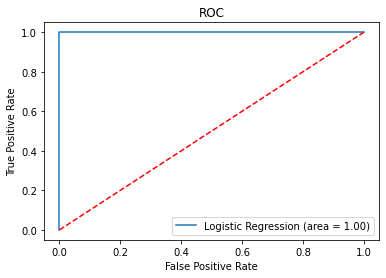

In [7]:
train_fpr, train_tpr, train_ = roc_curve(Y_Train, Y_train_pred.reshape(-1,1), pos_label=1)
train_logit_roc_auc = roc_auc_score(Y_Train, Y_train_pred.reshape(-1,1))
plt.plot(train_fpr,train_tpr,label='Logistic Regression (area = %0.2f)' % train_logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.legend(loc='lower right')
plt.show()

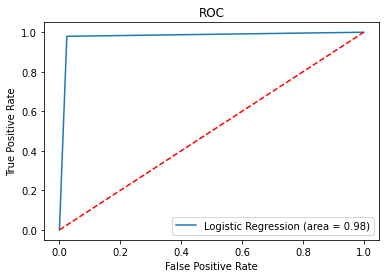

In [8]:
test_fpr, test_tpr, test_ = roc_curve(Y_Test, Y_test_pred.reshape(-1,1), pos_label=1)
test_logit_roc_auc = roc_auc_score(Y_Test, Y_test_pred.reshape(-1,1))
plt.plot(test_fpr,test_tpr,label='Logistic Regression (area = %0.2f)' % test_logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.legend(loc='lower right')
plt.show()

(e) L1-penalized Logistic Regression

i. Determine λ using five fold cross-validation on your training set. Consider log10 λ ∈ {−5, -4, ..., 5}.

ii.Train L1-penalized Logistic Regression using the λ you found in 1(e)i. Calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for your training set.

iii.
Test the algorithm on the test set and calculate the confusion matrix, accuracy, precision, recall, and F1 score as well as the ROC curve and AUC for the test set.

### L1 (Lasso) Penalized Logistic Regression

In [9]:
penalty_l1 = ['l1']
c_l1 = [1/pow(10,i) for i in range (-5, 6)]
print('C: ', c_l1)

parameters_l1 = {"C": c_l1,
             "penalty" :penalty_l1,
             "solver":['liblinear']}

gridcv_l1 = GridSearchCV(logistic, parameters_l1, cv=5, n_jobs=-1)

best_model = gridcv_l1.fit(train_vect, Y_Train)

print('Best C: ', best_model.best_estimator_.get_params()['C'])
print("Lambda: ", 1/(best_model.best_estimator_.get_params()['C']))

Y_train_pred_l1 = best_model.predict(train_vect)
Y_test_pred_l1 = best_model.predict(test_vect)

# for train predictions
train_cm_l1 = confusion_matrix(Y_Train, Y_train_pred_l1.reshape(-1,1))
train_TP_l1 = train_cm_l1[0][0]
train_FP_l1 = train_cm_l1[0][1]
train_FN_l1 = train_cm_l1[1][0]
train_TN_l1 = train_cm_l1[1][1]
train_precision_l1 = (train_TP_l1)/(train_TP_l1+train_FP_l1)
train_recall_l1 = (train_TP_l1)/(train_TP_l1+train_FN_l1)
train_f1_l1 = f1_score(Y_Train, Y_train_pred_l1.reshape(-1,1), average=None)

print("\nTraining Results: \n")
print("Confusion matrix: \n", train_cm_l1, "\n\n")
print("Precision: ", train_precision_l1, "\n")
print("Recall: ", train_recall_l1, "\n")
print("F1 Score ", train_f1_l1, "\n")


#for test predictions
test_cm_l1 = confusion_matrix(Y_Test, Y_test_pred_l1.reshape(-1,1))
test_TP_l1 = test_cm_l1[0][0]
test_FP_l1 = test_cm_l1[0][1]
test_FN_l1 = test_cm_l1[1][0]
test_TN_l1 = test_cm_l1[1][1]
test_precision_l1 = (test_TP_l1)/(test_TP_l1+test_FP_l1)
test_recall_l1 = (test_TP_l1)/(test_TP_l1+test_FN_l1)
test_f1_l1 = f1_score(Y_Test, Y_test_pred_l1.reshape(-1,1), average=None)

print("\nTesting Results: \n")
print("Confusion matrix: \n", test_cm_l1, "\n\n")
print("Precision: ", test_precision_l1, "\n")
print("Recall: ", test_recall_l1, "\n")
print("F1 Score ", test_f1_l1, "\n")

print("F betas: \n")

betas_l1 = [.1, .5, .9, 1, 5, 10]
f_beta_l1 = []

for i in betas_l1:
    f_beta_l1.append((i**2+1)/(((i**2)/test_recall_l1)+(1/test_precision_l1)))
    
print(f_beta_l1)


C:  [99999.99999999999, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05]
Best C:  1000.0
Lambda:  0.001

Training Results: 

Confusion matrix: 
 [[161   0]
 [  0 195]] 


Precision:  1.0 

Recall:  1.0 

F1 Score  [1. 1.] 


Testing Results: 

Confusion matrix: 
 [[41  0]
 [ 3 46]] 


Precision:  1.0 

Recall:  0.9318181818181818 

F1 Score  [0.96470588 0.96842105] 

F betas: 

[0.9992760617760618, 0.985576923076923, 0.9682933194154488, 0.9647058823529412, 0.934268185801928, 0.9324476469263678]


/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


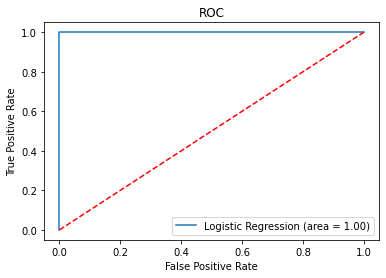

In [10]:
train_fpr_l1, train_tpr_l1, train__l1 = roc_curve(Y_Train, Y_train_pred_l1.reshape(-1,1), pos_label=1)
train_logit_roc_auc_l1 = roc_auc_score(Y_Train, Y_train_pred_l1.reshape(-1,1))
plt.plot(train_fpr_l1,train_tpr_l1,label='Logistic Regression (area = %0.2f)' % train_logit_roc_auc_l1)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.legend(loc='lower right')
plt.show()

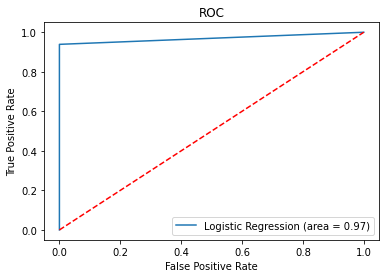

In [11]:
test_fpr_l1, test_tpr_l1, test__l1 = roc_curve(Y_Test, Y_test_pred_l1.reshape(-1,1), pos_label=1)
test_logit_roc_auc_l1 = roc_auc_score(Y_Test, Y_test_pred_l1.reshape(-1,1))
plt.plot(test_fpr_l1,test_tpr_l1,label='Logistic Regression (area = %0.2f)' % test_logit_roc_auc_l1)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.legend(loc='lower right')
plt.show()

Conclusion: both performed exceptionally well, with a slight edge going to ridge regression.

### Binary Classification Using Naive Bayes’ Classifiers

##### Gaussian class conditional distributions. We will report confusion matrix, ROC, precision, recall, and F1 score.

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_vect, Y_Train)

gnb_predictions_train = gnb.predict(train_vect)
gnb_predictions_test = gnb.predict(test_vect)


#for train predictions
gnb_train_cm = confusion_matrix(Y_Train, gnb_predictions_train.reshape(-1,1))
gnb_train_TP = gnb_train_cm[0][0]
gnb_train_FP = gnb_train_cm[0][1]
gnb_train_FN = gnb_train_cm[1][0]
gnb_train_TN = gnb_train_cm[1][1]
gnb_train_precision = (gnb_train_TP)/(gnb_train_TP+gnb_train_FP)
gnb_train_recall = (gnb_train_TP)/(gnb_train_TP+gnb_train_FN)
gnb_train_f1 = f1_score(Y_Train, gnb_predictions_train.reshape(-1,1), average=None)

print("Training Results: \n")
print("Confusion matrix: \n", gnb_train_cm, "\n\n")
print("Precision: ", gnb_train_precision, "\n")
print("Recall: ", gnb_train_recall, "\n")
print("F1 Score ", gnb_train_f1, "\n")



#for test predictions
gnb_test_cm = confusion_matrix(Y_Test, gnb_predictions_test.reshape(-1,1))
gnb_test_TP = gnb_test_cm[0][0]
gnb_test_FP = gnb_test_cm[0][1]
gnb_test_FN = gnb_test_cm[1][0]
gnb_test_TN = gnb_test_cm[1][1]
gnb_test_precision = (gnb_test_TP)/(gnb_test_TP+gnb_test_FP)
gnb_test_recall = (gnb_test_TP)/(gnb_test_TP+gnb_test_FN)
gnb_test_f1 = f1_score(Y_Test, gnb_predictions_test.reshape(-1,1), average=None)

print("\nTesting Results: \n")
print("Confusion matrix: \n", gnb_test_cm, "\n\n")
print("Precision: ", gnb_test_precision, "\n")
print("Recall: ", gnb_test_recall, "\n")
print("F1 Score ", gnb_test_f1, "\n")

Training Results: 

Confusion matrix: 
 [[161   0]
 [  0 195]] 


Precision:  1.0 

Recall:  1.0 

F1 Score  [1. 1.] 


Testing Results: 

Confusion matrix: 
 [[35  6]
 [ 1 48]] 


Precision:  0.8536585365853658 

Recall:  0.9722222222222222 

F1 Score  [0.90909091 0.93203883] 



/Users/willthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


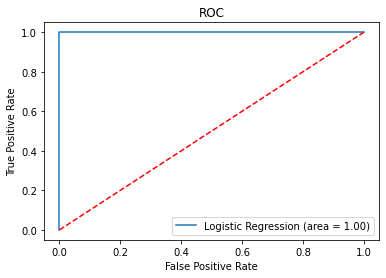

In [13]:
gnb_fpr, gnb_tpr, gnb_ = roc_curve(Y_Train, gnb_predictions_train.reshape(-1,1), pos_label=1)
gnb_logit_roc_auc_train = roc_auc_score(Y_Train, gnb_predictions_train.reshape(-1,1))
plt.plot(gnb_fpr,gnb_tpr,label='Logistic Regression (area = %0.2f)' % gnb_logit_roc_auc_train)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.legend(loc='lower right')
plt.show()

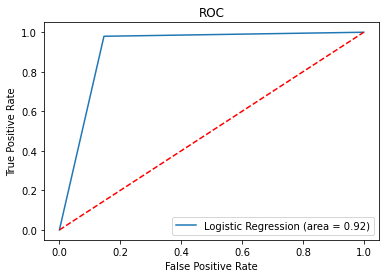

In [14]:
gnb_fpr_test, gnb_tpr_test, gnb__test = roc_curve(Y_Test, gnb_predictions_test.reshape(-1,1), pos_label=1)
gnb_logit_roc_auc_test = roc_auc_score(Y_Test, gnb_predictions_test.reshape(-1,1))
plt.plot(gnb_fpr_test,gnb_tpr_test,label='Logistic Regression (area = %0.2f)' % gnb_logit_roc_auc_test)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.legend(loc='lower right')
plt.show()

Conclusion: Gaussian NB performed relatively well, however both logistic regression models performed significantly better on the test set. Potential for overfitting, as all models achieved 100% accuracy on the training set.